In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
X = df.loc[:, ['GrLivArea', 'YearBuilt']]
y = df['SalePrice']

In [5]:
X = X.values
y = y.values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)

# 【問題1】ブレンディングのスクラッチ実装
ブレンディング をスクラッチ実装し、単一モデルより精度があがる例を 最低3つ 示してください。精度があがるとは、検証用データに対する平均二乗誤差（MSE）が小さくなることを指します。

In [7]:
# データlogで対数変換
#X_train = np.log(X_train)
#X_val = np.log(X_val)
y_train = np.log(y_train)
y_val = np.log(y_val)

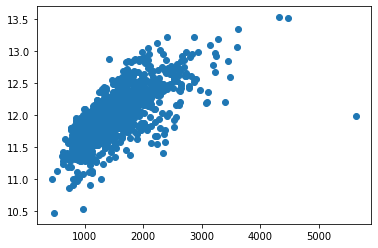

In [8]:
plt.scatter(X_train[:,0], y_train)

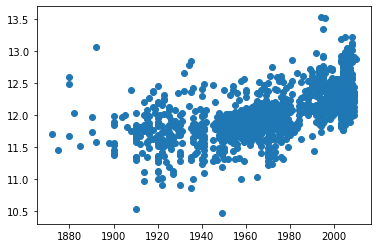

In [9]:
plt.scatter(X_train[:,1], y_train)

In [10]:
# 単一モデル 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
y_pred = dtr.predict(X_val)
single_tree_model_mse = mean_squared_error(y_val, y_pred)

In [12]:
print('決定木単一モデルMSEスコア：',single_tree_model_mse)

決定木単一モデルMSEスコア： 0.08326288818265261


In [13]:
# 線形回帰の単一モデル
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
single_linear_model_mse = mean_squared_error(y_val, y_pred)
print('線形回帰単一モデルMSEスコア：',single_linear_model_mse)

線形回帰単一モデルMSEスコア： 0.06050221349256183


## ブレンディング その１

In [14]:
#決定木モデル: 対数化したデータを使う・深さ３, 5, 7で学習させる
param_space = [3, 5, 7]

# 各パラメータに対するスコアを保存するリスト
pred_data = []

for i in param_space:
    b_dtr = DecisionTreeRegressor(max_depth=i)
    b_dtr.fit(X_train, y_train)
    y_pred = b_dtr.predict(X_val)
    print(mean_squared_error(y_val, y_pred))
    pred_data.append(y_pred)

0.06816830188622953
0.05118657961217685
0.062241136830208675


In [15]:
pred_data[0].shape

(292,)

In [16]:
#　加重平均
y_pred1 = pred_data[0]*0.4 + pred_data[1]*0.3 + pred_data[2]*0.3

In [17]:
# 平均
y_pred1a = (pred_data[0] + pred_data[1] + pred_data[2]) / 3

In [18]:
mean_squared_error(y_val, y_pred1)

0.0544284364060059

In [19]:
mean_squared_error(y_val, y_pred1a)

0.05378573165039676

## その２

In [20]:
# 線形回帰、決定木、SVMを使う
model_space = [LinearRegression, SVR, DecisionTreeRegressor]

# 各パラメータに対するスコアを保存するリスト
pred_data2 = []

for i in model_space:
    clf = i()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(mean_squared_error(y_val, y_pred))
    pred_data2.append(y_pred)

0.06050221349256183
0.15956768120636175
0.08299104497910603


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
y_pred2 = pred_data2[1]*0.3 + pred_data2[1]*0.5 + pred_data2[2]*0.2

In [22]:
mean_squared_error(y_val, y_pred2)

0.12434661612659129

# その３

In [23]:
pred_data3 = []
# Linear
clf = LinearRegression(fit_intercept=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
pred_data3.append(y_pred)

# SVR
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
pred_data3.append(y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
y_pred3 = pred_data3[1]*0.7 + pred_data3[1]*0.3

In [25]:
mean_squared_error(y_val, y_pred3)

0.16324324016713299

# 【問題2】バギングのスクラッチ実装
バギング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

In [26]:
# バギングデータの保管庫
bagging_data = []

# 任意の個数、データを作る
for i in range(3):
    X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3,shuffle=True)
    # データlogで対数変換
    #X_train2 = np.log(X_train2)
    #X_val2 = np.log(X_val2)
    y_train2 = np.log(y_train2)
    y_val2 = np.log(y_val2)
    bagging_data.append([X_train2, X_val2, y_train2, y_val2])

In [27]:
# 推定したデータの合計するための箱
pred_data = 0
m = len(bagging_data)

# bagging_dataの個数分推定値合計する
for i in range(m):
    dtr = DecisionTreeRegressor()
    dtr.fit(bagging_data[i][0], bagging_data[i][2])
    y_pred = dtr.predict(bagging_data[i][1])
    pred_data += y_pred

In [28]:
# 推定値の合計の平均を出す
y_pred_mean = pred_data / m

In [29]:
# 推定結果
mean_squared_error(y_val2, y_pred_mean)

0.131661263888276

In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_val)
mean_squared_error(y_val, rfr_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.05608296492287813

In [31]:
# 推定したデータの合計するための箱
pred_data = 0
m = len(bagging_data)

# bagging_dataの個数分推定値合計する
for i in range(m):
    dtr = DecisionTreeRegressor()
    dtr.fit(bagging_data[i][0], bagging_data[i][2])
    y_pred = dtr.predict(bagging_data[i][1])
    pred_data += y_pred

# 【問題3】スタッキングのスクラッチ実装
スタッキング をスクラッチ実装し、単一モデルより精度があがる例を 最低1つ 示してください。

In [32]:
# データの作り直し
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3,shuffle=True)
X_train3 = np.log(X_train3)
X_test3 = np.log(X_test3)
y_train3 = np.log(y_train3)
y_test3 = np.log(y_test3)

In [33]:
print('線形回帰単一モデルMSEスコア：',single_linear_model_mse)

線形回帰単一モデルMSEスコア： 0.06050221349256183


In [34]:
# データの作り直し
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3,shuffle=True)
#X_train3 = np.log(X_train3)
#X_test3 = np.log(X_test3)
y_train3 = np.log(y_train3)
y_test3 = np.log(y_test3)

from sklearn.model_selection import KFold
# 3つのデータを作成
kf = KFold(n_splits=3, shuffle= False, random_state=0)

# モデルリスト
model_space = [LinearRegression,SVR, DecisionTreeRegressor]
models = ["lr", "svr", "dtr"]

# trainデータのpred保管用
model_data = np.zeros([X_train3.shape[0], len(model_space)])

# 正解ラベルの保管用
answer_data = np.zeros([y_train3.shape[0], len(model_space)])

# testデータのpred保管用
test_model_data = np.zeros([X_test3.shape[0], len(model_space)])


# 第一フェーズの学習と推定
for i in range(len(model_space)):
    #modelの定義（model_space内の各モデル呼び出している）
    models[i] = model_space[i]()
    
    #predデータの一時保管
    pred_data = np.array([])
    
    #kfoldの正解データ保管
    y_val_data = np.array([])
    
    #testデータの保管（kfoldの数、テストデータの数）
    test_pred_data = np.zeros([3, X_test3.shape[0]])
    count = 0
    
    for tra_idx, tes_idx in kf.split(X_train3):
        # pred_data = np.zeros(3)
        # データの作成
        X_train, X_val = X_train3[tra_idx], X_train3[tes_idx]
        y_train, y_val = y_train3[tra_idx], y_train3[tes_idx]
        
        # モデルのフィット
        models[i].fit(X_train, y_train)
        
        # 学習データの予測と保管
        y_pred = models[i].predict(X_val)
        pred_data = np.append(pred_data, y_pred)
        print(count+ 1,'個目のMSE：', mean_squared_error(y_val, y_pred), sep='')
        
        #　正解ラベルの保管
        y_val_data = np.append(y_val_data, y_val)
        
        
        # test推定データの予測と保管
        test_pred_data[count] = models[i].predict(X_test3)
        #test_pred_data = test_pred
        count += 1
        
    # 各モデルごとのpredの値を保存
    model_data[:, i] = pred_data
    answer_data[:, i] = y_val_data
    test_model_data[:, i] = test_pred_data.mean(axis=0)

1個目のMSE：0.04299585697948747
2個目のMSE：0.05809860613511919
3個目のMSE：0.046867516261017164
1個目のMSE：0.14384917088100976
2個目のMSE：0.13664067825893825
3個目のMSE：0.15534945485955498
1個目のMSE：0.07332635692551598
2個目のMSE：0.07279634403922104
3個目のMSE：0.07394735761792418


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
print(model_data.shape)
print(answer_data.shape)
print(test_model_data.shape)

(1022, 3)
(1022, 3)
(438, 3)


In [36]:
# lastフェーズの学習
lr2 = LinearRegression()
lr2.fit(model_data, answer_data[:, 0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
t_pre = lr2.predict(test_model_data)
stack_model_mse = mean_squared_error(y_test3, t_pre)

In [38]:
print('線形回帰単一モデルMSEスコア：',single_linear_model_mse)
print('スタックモデルMSEスコア：',stack_model_mse)

線形回帰単一モデルMSEスコア： 0.06050221349256183
スタックモデルMSEスコア： 0.04383848865670417


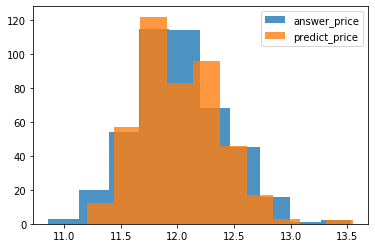

In [48]:
plt.hist(y_test3, alpha=0.8, label="answer_price")
plt.hist(t_pre, alpha=0.8, label="predict_price")
plt.legend()
plt.show();